# **Assignment 3.1 Practice Problem 1 (Build a Graph)**

Problem:
You are given an integer n. Determine if there is an unconnected graph with n vertices that contains at least two connected components and contains the number of edges that is equal to the number of vertices.

Each vertex must follow one of these conditions:
- Its degree is less than or equal to 1.
- It's a cut-vertex

Note:
The graph must be simple.
Loops and multiple edges are not allowed.

Input format:
First line: n

Output format:
Print Yes if it is an unconnected graph. Otherwise, print No.

Constraints:
1 < = n < = 100


In [ ]:
class Graph(object):
    def __init__(self, graph_dict=None):
        if graph_dict is None:
            graph_dict = {}
        self._graph_dict = graph_dict

    def edges(self, vertex):
        return self._graph_dict[vertex]

    def all_vertices(self):
        return set(self._graph_dict.keys())

    def all_edges(self):
        return self.__generate_edges()

    def add_vertex(self, vertex):
        if vertex not in self._graph_dict:
            self._graph_dict[vertex] = []

    def add_edge(self, edge):
        edge = set(edge)
        vertex1, vertex2 = tuple(edge)
        for x, y in [(vertex1, vertex2), (vertex2, vertex1)]:
            if x in self._graph_dict:
                self._graph_dict[x].append(y)
            else:
                self._graph_dict[x] = [y]

    def __generate_edges(self):
        edges = []
        for vertex in self._graph_dict:
            for neighbour in self._graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges

    def __iter__(self):
        self._iter_obj = iter(self._graph_dict)
        return self._iter_obj

    def __next__(self):
        return next(self._iter_obj)

    def __str__(self):
        res = "vertices: "
        for k in self._graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res

    def find_path(self, start_vertex, end_vertex, path=None):
        if path is None:
            path = []
        graph = self._graph_dict
        path = path + [start_vertex]
        if start_vertex == end_vertex:
            return path
        if start_vertex not in graph:
            return None
        for vertex in graph[start_vertex]:
            if vertex not in path:
                extended_path = self.find_path(vertex, end_vertex, path)
                if extended_path:
                    return extended_path
        return None

    def find_all_paths(self, start_vertex, end_vertex, path=[]):
        graph = self._graph_dict
        path = path + [start_vertex]
        if start_vertex == end_vertex:
            return [path]
        if start_vertex not in graph:
            return []
        paths = []
        for vertex in graph[start_vertex]:
            if vertex not in path:
                extended_paths = self.find_all_paths(vertex, end_vertex, path)
                for p in extended_paths:
                    paths.append(p)
        return paths

def is_unconnected_graph(n):
    #Check if n is less than or equal to 2 or greater than 100
    if n <= 2 or n > 100:
      #If n meets the condition, return "No"
        return "No"

    graph = Graph()
    #Add n vertices
    for i in range(n):
        graph.add_vertex(str(i))

    #Add n-1 edges to create a single connected component
    for i in range(n - 1):
        graph.add_edge({str(i), str(i + 1)})

    #Check if there is an extra vertex with degree <= 1
    #This makes sure there are at least 2 connected components
    if n % 2 == 0:
        #If n is even, add one more edge to create a cycle
        graph.add_edge({str(n - 1), '0'})
    else:
        #If n is odd, add one more isolated vertex
        graph.add_vertex(str(n))

    #Print the edges
    print("Edges in the graph:", graph.all_edges())

    #Check if number of edges equals number of vertices
    if len(graph.all_edges()) == n:
        return "No"
    else:
        return "Yes"

#Input
n = int(input("Enter the number of vertices: "))

#Output
result = is_unconnected_graph(n)
if result == "Yes":
    print("An Unconnected Graph: Yes")
else:
    print("An Unconnected Graph: No")

Enter the number of vertices: 7
Edges in the graph: [{'1', '0'}, {'1', '2'}, {'3', '2'}, {'3', '4'}, {'5', '4'}, {'5', '6'}]
An Unconnected Graph: Yes


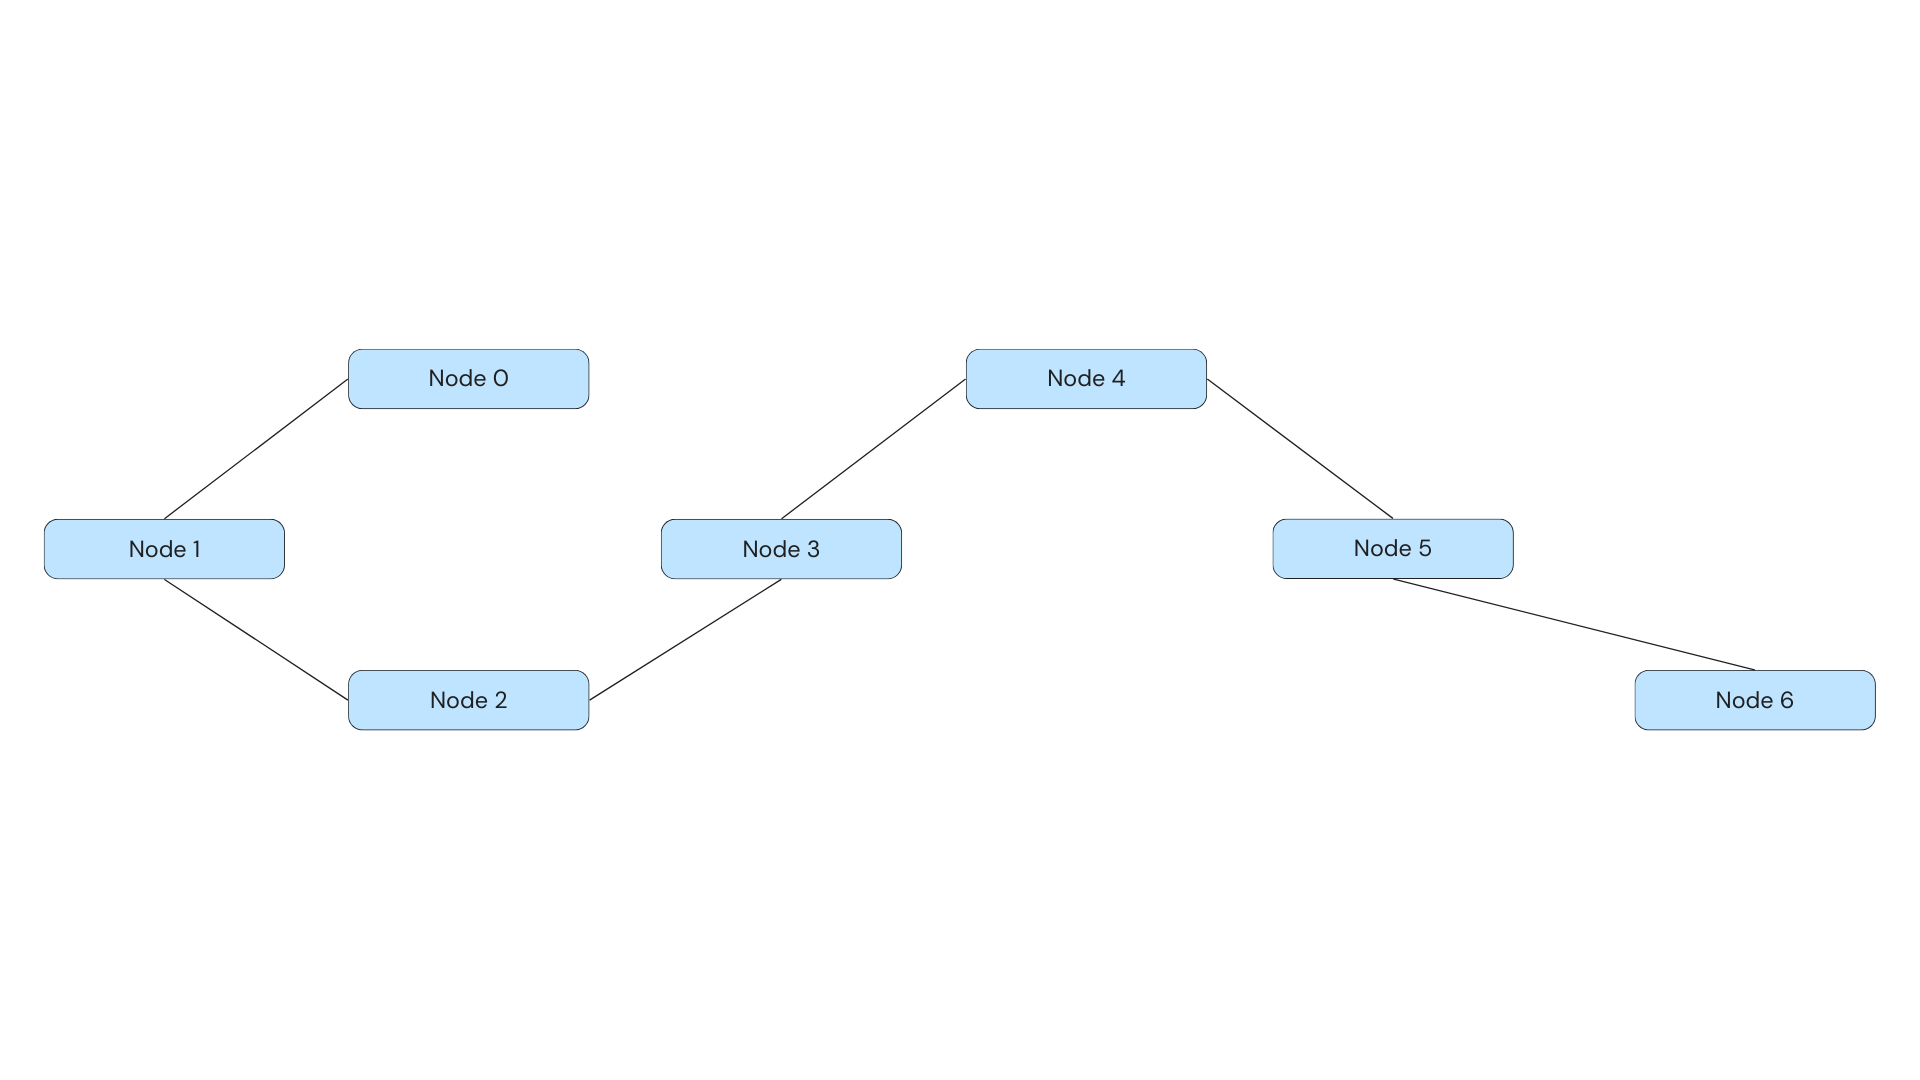